# Data Visualization -- Part 2

This part focus on **average tweets per day** and **number of hash tags**.

From the data set, all genuine users' accounts are chosen. To compare with them, row 502-955 in social_1, row 502-1979 in social_2, all rows in social_3, all rows in tradition_2, all rows in tradition_3 and row 502-1079 in tradition_4. As a result, the number of genuine users and spam users are the same.

In [2]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)

# genuine_user count: 3474
genuine_user = pd.read_csv("data/genuine_accounts.csv/genuine_accounts.csv/users.csv")
# fake followers count: skip this
# fake_user = pd.read_csv("data/fake_followers.csv/fake_followers.csv/users.csv", skiprows = 477, nrows = 500)
# social 1 retweeters of Italian political candidate count: top 500
social_1 = pd.read_csv("data/social_spambots_1.csv/social_spambots_1.csv/users.csv", skiprows = [1, 501], nrows = 453)
# social 2 paid apps for mobile devices
social_2 = pd.read_csv("data/social_spambots_2.csv/social_spambots_2.csv/users.csv", skiprows = [1, 501], nrows = 1477)
# social 3 products on sale at Amazon.com
social_3 = pd.read_csv("data/social_spambots_3.csv/social_spambots_3.csv/users.csv")
# tradition 1 training set used by someone
# tradition_1 = pd.read_csv("data/traditional_spambots_1.csv/users.csv", nrows = 500)
# tradition 2 scam URLS
tradition_2 = pd.read_csv("data/traditional_spambots_2.csv/traditional_spambots_2.csv/users.csv")
# tradition 3 automated accounts spamming job offers
tradition_3 = pd.read_csv("data/traditional_spambots_3.csv/traditional_spambots_3.csv/users.csv")
# tradition 4 another group of automated accounts spamming job offers
tradition_4 = pd.read_csv("data/traditional_spambots_4.csv/traditional_spambots_4.csv/users.csv", skiprows = [1, 501], nrows = 577)

spam_list_ = []
# spam_list_.append(fake_user)
# list_.append(tradition_1)
spam_list_.append(tradition_2)
spam_list_.append(tradition_3)
spam_list_.append(tradition_4)
spam_list_.append(social_1)
spam_list_.append(social_2)
spam_list_.append(social_3)

combined_spam = pd.concat(spam_list_)

combined_spam.to_csv( "combined_fake_2.csv", index=False )
genuine_user.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,...,NaN,15years ago X.Lines24,NaN,NaN,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0,0
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,NaN,ja,...,NaN,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),NaN,NaN,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0,0
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,NaN,en,...,NaN,Let me see what your best move is!,NaN,NaN,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0,0
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,NaN,20. menna: #farida #nyc and the 80s actually y...,NaN,NaN,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0,0
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,NaN,en,...,NaN,Cosmetologist,NaN,NaN,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0,0


In [3]:
genuine_user["id"] = genuine_user["id"].astype(str)
print(genuine_user.dtypes)

id                                     object
name                                   object
screen_name                            object
statuses_count                          int64
followers_count                         int64
friends_count                           int64
favourites_count                        int64
listed_count                            int64
url                                    object
lang                                   object
time_zone                              object
location                               object
default_profile                       float64
default_profile_image                 float64
geo_enabled                           float64
profile_image_url                      object
profile_banner_url                     object
profile_use_background_image          float64
profile_background_image_url_https     object
profile_text_color                     object
profile_image_url_https                object
profile_sidebar_border_color      

In [14]:
combined_spam["id"] = combined_spam["id"].astype(str)
combined_spam["crawled_at"] = combined_spam["crawled_at"].astype(str)
combined_spam["created_at"] = combined_spam["created_at"].astype(str)
print(combined_spam.dtypes)

contributors_enabled                  float64
crawled_at                             object
created_at                             object
default_profile                       float64
default_profile_image                 float64
description                            object
favourites_count                        int64
follow_request_sent                   float64
followers_count                         int64
following                             float64
friends_count                           int64
geo_enabled                           float64
id                                     object
is_translator                         float64
lang                                   object
listed_count                            int64
location                               object
name                                   object
notifications                         float64
profile_background_color               object
profile_background_image_url           object
profile_background_image_url_https

In [25]:
genuine_create_list = genuine_user['created_at']
genuine_crawl_list = genuine_user['crawled_at']
genuine_tweets_number_list = genuine_user['statuses_count']

spam_create_list = combined_spam['created_at'].tolist()
spam_crawl_list = combined_spam['crawled_at'].tolist()
spam_tweets_number_list = combined_spam['statuses_count'].tolist()

In [26]:
# playground
# len(spam_crawl_list)
# len(genuine_create_list)
# type(spam_crawl_list)

list

In [29]:
from datetime import datetime

# define format of date time
FMT_create = '%a %b %d %H:%M:%S %Y'
FMT_crawl = '%Y-%m-%d %H:%M:%S'

genuine_user_age = []
spam_user_age = []
genuine_user_avg_tweets = []
spam_user_avg_tweets = []

# Calculate tweets per day for genuine users
for i in range(3474):
    s1 = genuine_create_list[i]
    s1 = s1[:19] + s1[25:] # +0000 cannot be parsed using %z since striptime doesn't have support for it
    s2 = genuine_crawl_list[i]
    t_create = datetime.strptime(s1, FMT_create)
    t_crawl = datetime.strptime(s2, FMT_crawl)
    age = abs((t_crawl - t_create).days)
    genuine_user_age.append(age)
    avg = float(genuine_tweets_number_list[i]) / age
    genuine_user_avg_tweets.append(round(avg, 2))
print max(genuine_user_avg_tweets)
# Calculate tweets per day for spam users
for j in range(3474):
    s1 = spam_create_list[j]
    s1 = s1[:19] + s1[25:] # +0000 cannot be parsed using %z since striptime doesn't have support for it
    s2 = spam_crawl_list[j]
    t_create = datetime.strptime(s1, FMT_create)
    t_crawl = datetime.strptime(s2, FMT_crawl)
    age = abs((t_crawl - t_create).days)
    spam_user_age.append(age)
    avg = float(spam_tweets_number_list[j]) / age
    spam_user_avg_tweets.append(round(avg, 2))
print max(spam_user_avg_tweets)

1212.45
370.33


**Analysis:**<br>
Several x-axis ranges are tested to show a better performance here. From the histogram below, we can find that most spam users post **0-1.5** tweets daily. Only few of spam users post more than **2** tweets. However, the distribution of genuine users is more even. My idea is to check if a user tweets less than once per day: if true, we will take it as a spam user; if false, we will take it as a genuine user. 

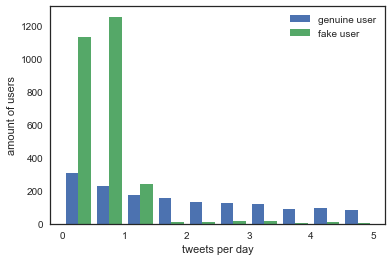

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
# bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# bins = [0, 1, 2, 3, 4, 5]
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.hist([genuine_user_avg_tweets, spam_user_avg_tweets], bins = bins,label=['genuine user', 'fake user'])
plt.legend(loc='upper right')
plt.xlabel('tweets per day')
plt.ylabel('amount of users')
plt.show()
